## Scraping from Reddit with Reddit API

In [ ]:
!pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 188 kB 7.5 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 


In [ ]:
import praw
import pandas as pd

user_agent = "Resddit Scraper by /u/tobbydah"
reddit = praw.Reddit(
    client_id = "xxxxxxxxxxxxxxx",
    client_secret = "xxxxxxxxxxxxxxxxxxxxxxxxx",
    user_agent = user_agent
)

In [ ]:
# hot new rising top
import pandas as pd
headlines = []

# Scraping subreddit for Autism
for submission in reddit.subreddit('autism').hot(limit=None):
    headlines.append([submission.title, submission.score, submission.id, submission.author, submission.subreddit, 
                      submission.url, submission.num_comments, submission.selftext, submission.created, submission.created_utc])

autism_df = pd.DataFrame(headlines, 
                         columns=['title', 'score', 'id', 'author', 'subreddit', 'url', 'num_comments', 'body', 'created', 'created_utc'])

# Scraping subreddit for Depression
for submission in reddit.subreddit('depression').hot(limit=None):
    headlines.append([submission.title, submission.score, submission.id, submission.author, submission.subreddit, 
                      submission.url, submission.num_comments, submission.selftext, submission.created, submission.created_utc])

depression_df = pd.DataFrame(headlines, 
                         columns=['title', 'score', 'id', 'author', 'subreddit', 'url', 'num_comments', 'body', 'created', 'created_utc'])

# Scraping subreddit for ADHD
for submission in reddit.subreddit('ADHD').hot(limit=None):
    headlines.append([submission.title, submission.score, submission.id, submission.author, submission.subreddit, 
                      submission.url, submission.num_comments, submission.selftext, submission.created, submission.created_utc])

adhd_df = pd.DataFrame(headlines, 
                         columns=['title', 'score', 'id', 'author', 'subreddit', 'url', 'num_comments', 'body', 'created', 'created_utc'])

# Scraping subreddit for Anxiety
for submission in reddit.subreddit('anxiety').hot(limit=None):
    headlines.append([submission.title, submission.score, submission.id, submission.author, submission.subreddit, 
                      submission.url, submission.num_comments, submission.selftext, submission.created, submission.created_utc])

anxiety_df = pd.DataFrame(headlines, 
                         columns=['title', 'score', 'id', 'author', 'subreddit', 'url', 'num_comments', 'body', 'created', 'created_utc'])


#Joining the four subreddits and saving data to a single CSV
mental_health_categories = pd.concat([autism_df, adhd_df, anxiety_df, depression_df])
#mental_health_categories.to_csv('C:/Users/USER/Downloads/Data Science/MindSum/Reddit Dataset/mental_health_categories_new4.csv', header=True, encoding='utf-8', index=False)

#print(len(headlines))

In [ ]:
mental_health_categories

,title,score,id,author,subreddit,url,num_comments,body,created,created_utc
0,Let’s talk about ABA therapy. ABA posts outsid...,740,ub3skp,cakeisatruth,autism,https://www.reddit.com/r/autism/comments/ub3sk...,1106,ABA (Applied Behavior Analysis) therapy is one...,1.650833e+09,1.650833e+09
1,Same Food Saturdays !,14,xgfgbg,sybersonic,autism,https://www.reddit.com/r/autism/comments/xgfgb...,18,Most of us consistency love consistency. Shar...,1.663398e+09,1.663398e+09
2,"What foods are like this to you guys? To me, i...",1654,xgrgte,Dimentiorules,autism,https://i.redd.it/enzbkhes7go91.jpg,476,,1.663433e+09,1.663433e+09
3,Got to a point where the walls were shaking fr...,760,xgxevr,jwin1211,autism,https://i.redd.it/qa4pljsufho91.jpg,101,,1.663448e+09,1.663448e+09
4,masking meme,113,xh2hz6,RestlessMind95,autism,https://i.redd.it/pju3zwq6kio91.jpg,3,,1.663462e+09,1.663462e+09
...,...,...,...,...,...,...,...,...,...,...
1957,life is an everyday struggle,1,xe07a1,_Ithri_,depression,https://www.reddit.com/r/depression/comments/x...,1,"Hey all, just wanted to share a bit what I'm g...",1.663157e+09,1.663157e+09
1958,very depressed,1,xe05x5,OkBuilder8671,depression,https://www.reddit.com/r/depression/comments/x...,0,Hello guys I wish to die tonight. \nThis life ...,1.663157e+09,1.663157e+09
1959,How to cry,1,xdzvx1,applirium,depression,https://www.reddit.com/r/depression/comments/x...,0,"I am asking for help, want to cry but i cannot...",1.663156e+09,1.663156e+09
1960,"aw shit, here we go again",1,xdzp3n,scream-in-thevoid,depression,https://www.reddit.com/r/depression/comments/x...,0,wish I had one day I could wake up and not hav...,1.663156e+09,1.663156e+09


In [ ]:
# mental_health_categories['pattern_match'] = mental_health_categories['body'].str.contains('rest of it being useless')
# mental_health_categories

# Searching using specific key words indicating a post has a form of mental health condition according to insight taken from
# mental health symptoms specified in ICD-11 document

recent_diagnosis = mental_health_categories[mental_health_categories['body'].str.contains('recently diagnosed')==True]
tired_of_life = mental_health_categories[mental_health_categories['body'].str.contains('tired of life')==True]
kill_myself = mental_health_categories[mental_health_categories['body'].str.contains('will kill myself')==True]
depressed = mental_health_categories[mental_health_categories['body'].str.contains('am depressed')==True]
meaningless_life = mental_health_categories[mental_health_categories['body'].str.contains(r'life is meaningless')==True]
feeling_sad = mental_health_categories[mental_health_categories['body'].str.contains(r'feeling sad')==True]
guilty = mental_health_categories[mental_health_categories['body'].str.contains(r'feel guilty')==True]
confused = mental_health_categories[mental_health_categories['body'].str.contains(r'am confused')==True]
cannot_sleep = mental_health_categories[mental_health_categories['body'].str.contains(r"can't sleep")==True]
cannot_understand = mental_health_categories[mental_health_categories['body'].str.contains(r"can't understand")==True]
worthless = mental_health_categories[mental_health_categories['body'].str.contains(r"worthless")==True]
traumatized = mental_health_categories[mental_health_categories['body'].str.contains(r"traumatized")==True]
worry = mental_health_categories[mental_health_categories['body'].str.contains(r"worried")==True]
anxious = mental_health_categories[mental_health_categories['body'].str.contains(r"anxious")==True]
ashamed = mental_health_categories[mental_health_categories['body'].str.contains(r"ashamed")==True]
mental_breakdown = mental_health_categories[mental_health_categories['body'].str.contains(r"mental breakdown")==True]
lonely = mental_health_categories[mental_health_categories['body'].str.contains(r"lonely")==True]
hate_myself = mental_health_categories[mental_health_categories['body'].str.contains(r"I hate myself")==True]
dont_know_want = mental_health_categories[mental_health_categories['body'].str.contains(r"don’t know what I want")==True]
dont_know = mental_health_categories[mental_health_categories['body'].str.contains(r"I don’t know")==True]
dont_have = mental_health_categories[mental_health_categories['body'].str.contains(r"I don’t have")==True]
weird = mental_health_categories[mental_health_categories['body'].str.contains(r"weird")==True]
dont_have_friends = mental_health_categories[mental_health_categories['body'].str.contains(r"i dont have any friends")==True]
feel_like = mental_health_categories[mental_health_categories['body'].str.contains(r"i feel like")==True]

mhsu = pd.concat([recent_diagnosis, tired_of_life, kill_myself, depressed, meaningless_life, feeling_sad, guilty, \
                  confused, cannot_sleep, cannot_understand, worthless, traumatized, worry, anxious, ashamed, \
                 mental_breakdown, lonely, hate_myself, dont_know_want, dont_know, dont_have, weird, dont_have_friends, \
                 feel_like])
mhsu.to_csv('C:/Users/USER/Downloads/Data Science/MindSum/Reddit Dataset/mhsu_new.csv', header=True, encoding='utf-8', index=False)
mhsu

### Scraping for individual user posts



In [ ]:
all_autism = mhsu[mhsu['subreddit']=='autism'].author.astype(str).tolist()
all_autism = list(dict.fromkeys(all_autism))
print('Total Autism post is {}' .format(len(all_autism)))

all_depression = mhsu[mhsu['subreddit']=='depression'].author.astype(str).tolist()
all_depression = list(dict.fromkeys(all_depression))
print('Total Depression post is {}' .format(len(all_depression)))

all_adhd = mhsu[mhsu['subreddit']=='ADHD'].author.astype(str).tolist()
all_adhd = list(dict.fromkeys(all_adhd))
print('Total ADHD post is {}' .format(len(all_adhd)))

all_Anxiety = mhsu[mhsu['subreddit']=='Anxiety'].author.astype(str).tolist()
all_Anxiety = list(dict.fromkeys(all_Anxiety))
print('Total Anxiety post is {}' .format(len(all_Anxiety)))

In [ ]:
#author=(mental_health_categories.author)[:1] ##["whzy0i", "ub3skp"]
#author = ['Effective-Bridge8937']
#author = mhsu['author'].astype(str).tolist()
author = all_Anxiety

i = []
for authors in author:
    try:
        submission = reddit.redditor(authors).submissions.hot(limit=None) # Note: cannot pull more than 1000 at a time
        for column in submission:
            i.append([column.title, column.id, column.subreddit, column.selftext, column.author, column.created])
    except:
        pass
su = pd.DataFrame(i, columns=['title', 'id', 'subreddit', 'selftext', 'author', 'created'])

#su.to_csv('C:/Users/USER/Downloads/Data Science/MindSum/Reddit Dataset/mhsu_single_users_total.csv', header=True, encoding='utf-8', index=False)
su.to_csv('C:/Users/USER/Downloads/Data Science/MindSum/Reddit Dataset/all_Anxiety.csv', header=True, encoding='utf-8', index=False)

In [ ]:
### Joining the four single-user categories together

autism_posts = pd.read_csv('C:/Users/USER/Downloads/Data Science/MindSum/Reddit Dataset/all_autism.csv')
depression_posts = pd.read_csv('C:/Users/USER/Downloads/Data Science/MindSum/Reddit Dataset/all_depression.csv')
adhd_posts = pd.read_csv('C:/Users/USER/Downloads/Data Science/MindSum/Reddit Dataset/all_adhd.csv')
anxiety_posts = pd.read_csv('C:/Users/USER/Downloads/Data Science/MindSum/Reddit Dataset/all_Anxiety.csv')

autism_posts['label'] = 'autism'
depression_posts['label'] = 'depression'
adhd_posts['label'] = 'ADHD'
anxiety_posts['label'] = 'anxiety'

mhsu_total = pd.concat([autism_posts, depression_posts, adhd_posts, anxiety_posts])
mhsu_total.to_csv('C:/Users/USER/Downloads/Data Science/MindSum/Reddit Dataset/mhsu_total.csv', header=True, encoding='utf-8', index=False)

## Importing Libraries

In [ ]:
%matplotlib inline
import re
import string
import nltk
nltk.download('stopwords')
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, roc_auc_score, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words('english')
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
mhsu = pd.read_csv('/content/drive/MyDrive/Mindsum/mhsu_total.csv')
mhsu

,title,id,subreddit,selftext,author,created,label
0,What to do?,wxut1r,autism,My partner’s kid just recently has been diagno...,Noradd_123,1.661475e+09,autism
1,ASUS - ROUTER - GT-5300 ROG - AIMesh?,vbluyd,ASUS,"Hey all, I've had This router for a while now,...",Noradd_123,1.655153e+09,autism
2,Why does Defillama not consider Milkomeda a Ca...,ttavji,cardano,Just thought it was weird?\n\nI'm simply curio...,Noradd_123,1.648764e+09,autism
3,COTI vs DJED vs SHEN vs ADA - Can anyone ELI5 ...,tq8x2w,cardano,Hey All\n\nI'm trying to understand the relati...,Noradd_123,1.648473e+09,autism
4,Inquiry: Cold Climate,tpr09q,Kombucha,Hey All - I'm trying to figure out if it is wo...,Noradd_123,1.648409e+09,autism
...,...,...,...,...,...,...,...
48274,struggling a lot with health anxiety,v3ula0,Anxiety,"i used to be doing okay, but ever since I had ...",justarandomaccountyk,1.654244e+09,anxiety
48275,feel like i don't take in enough air,v1pj9k,medical,For the past few days I (F16) have been feelin...,justarandomaccountyk,1.654001e+09,anxiety
48276,anxiety is ruining my social life and taking a...,wvdk04,Anxiety,i've had anxiety my whole life. i used to go t...,Main_Text9632,1.661224e+09,anxiety
48277,tips for cleaning self?,wlklp5,TheGirlSurvivalGuide,[removed],Main_Text9632,1.660200e+09,anxiety


In [ ]:
mhsu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48279 entries, 0 to 48278
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      48279 non-null  object 
 1   id         48279 non-null  object 
 2   subreddit  48279 non-null  object 
 3   selftext   33062 non-null  object 
 4   author     48279 non-null  object 
 5   created    48279 non-null  float64
 6   label      48279 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.6+ MB


In [ ]:
mhsu.label.value_counts()

anxiety       20443
autism         9946
depression     9675
ADHD           8215
Name: label, dtype: int64

In [ ]:
# Checking for duplicates across rows
mhsu[mhsu.duplicated()].count()

title        0
id           0
subreddit    0
selftext     0
author       0
created      0
label        0
dtype: int64

In [ ]:
# Merging the title text to the post

#mhsu['text'] = mhsu['title'].astype(str) + ' ' + mhsu['selftext'].astype(str)
mhsu = mhsu[['label', 'selftext']]
mhsu

,label,selftext
0,autism,My partner’s kid just recently has been diagno...
1,autism,"Hey all, I've had This router for a while now,..."
2,autism,Just thought it was weird?\n\nI'm simply curio...
3,autism,Hey All\n\nI'm trying to understand the relati...
4,autism,Hey All - I'm trying to figure out if it is wo...
...,...,...
48274,anxiety,"i used to be doing okay, but ever since I had ..."
48275,anxiety,For the past few days I (F16) have been feelin...
48276,anxiety,i've had anxiety my whole life. i used to go t...
48277,anxiety,[removed]


In [ ]:
print ('Number of missing values in label: {}'. format(mhsu.label.isnull().sum()))
print ('Number of missing values in body: {}'. format(mhsu.selftext.isnull().sum()))

Number of missing values in label: 0
Number of missing values in body: 15217


In [ ]:
mhsu = mhsu.dropna()
mhsu = mhsu[mhsu.selftext!='[removed]']

In [ ]:
mhsu.label.value_counts()

anxiety       13604
depression     5871
ADHD           4903
autism         4502
Name: label, dtype: int64

#### Converting top a Binary Classification Problem

With Anxiety --> Without Anxiety

In [ ]:
anx = mhsu[mhsu['label']=='anxiety']
dep = mhsu[mhsu['label']=='depression']
ADHD = mhsu[mhsu['label']=='ADHD']
aut = mhsu[mhsu['label']=='autism']
others = pd.concat([dep, ADHD, aut])
others['label'] = 'Without Anxiety'
anx['label'] = 'With Anxiety'
mhsu_new = pd.concat([anx, others])
mhsu_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,label,selftext
27836,With Anxiety,"So I recently quit my job, it was in finance, ..."
27837,With Anxiety,"I’m really not doing well, it’s my own fault, ..."
27838,With Anxiety,And they don’t get it. I let them know I decid...
27839,With Anxiety,I hate my job. I feel guilty because the pay a...
27840,With Anxiety,I just got approved for an apartment so I’ll b...
...,...,...
9936,Without Anxiety,I found out a few days ago when I looked at my...
9937,Without Anxiety,I found a video on a cassette of her smoking w...
9940,Without Anxiety,So I’ve been trying to mod gta 5 solo online f...
9943,Without Anxiety,"Im a virgin and i want to be until marriage, b..."


In [ ]:
mhsu_new.label.value_counts()

Without Anxiety    15276
With Anxiety       13604
Name: label, dtype: int64

Text(0.5, 0, 'Categories Type')

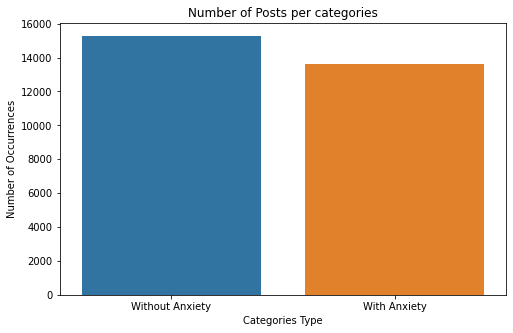

In [ ]:
rowsums = mhsu_new.iloc[:,:1].sum(axis=1)
x = rowsums.value_counts()

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Number of Posts per categories")
plt.ylabel('Number of Occurrences')
plt.xlabel('Categories Type')

In [ ]:
# Dealing with class imbalance by upsampling and downsampling the dataset
from sklearn.utils import resample

Anxiety_to_scale = mhsu_new[mhsu_new.label=='With Anxiety']
Without_Anxiety_to_scale = mhsu_new[mhsu_new.label=='Without Anxiety']

# to upscale Anxiety class
Anxiety_scaled = resample(Anxiety_to_scale,
                            replace=False,     # sample with replacement
                            n_samples=12000,    # to match majority class
                            random_state=1234) # reproducible results
 
# to upscale ADHD class
Without_Anxiety_scaled = resample(Without_Anxiety_to_scale,
                                  replace=False,     # sample with replacement
                                  n_samples=12000,    # to match majority class
                                  random_state=1235) # reproducible results
 
# Combine majority class with upsampled minority class
mhsu_balanced = pd.concat([Anxiety_scaled, Without_Anxiety_scaled])


mhsu_balanced.label.value_counts()

With Anxiety       12000
Without Anxiety    12000
Name: label, dtype: int64

Text(0.5, 0, 'Categories Type')

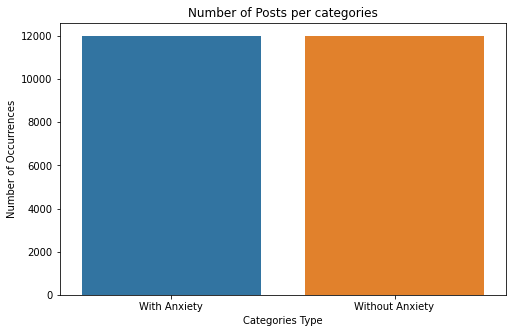

In [ ]:
rowsums = mhsu_balanced.iloc[:,:1].sum(axis=1)
x = rowsums.value_counts()

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Number of Posts per categories")
plt.ylabel('Number of Occurrences')
plt.xlabel('Categories Type')

In [ ]:
mhsu_balanced

,label,selftext
31579,With Anxiety,Been trying to join some discord servers to ma...
32895,With Anxiety,I can’t stop worrying about it and thinking I ...
44954,With Anxiety,I may have gerd lol. Imma see
39341,With Anxiety,I want to break no contact. I have this naggin...
39009,With Anxiety,\ni’m in grad school now. but i went through 4...
...,...,...
12989,Without Anxiety,"Hello everyone, my piggy Lucky seemed to be co..."
9291,Without Anxiety,"I’ve just thought of this because, since I’ve ..."
9889,Without Anxiety,i developed a fucking eating disorder im so fu...
11410,Without Anxiety,I’d rather not apply for another credit card. ...


In [ ]:
stop_words = set(stopwords) - set(['not', "don't", "didn't", "hadn't", "hasn't", "haven't", "won't", "wouldn't" ])
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    sentence = text.replace(r"http\S+", "")
    sentence = sentence.replace(r'^https?:\/\/.*[\r\n]*', '')
    sentence = sentence.replace(r"https\S+", "")
    sentence = sentence.replace(r"http", "")
    sentence = sentence.replace(r"https", "")
    tokens = re.split('\W+', sentence)
    text = [word for word in tokens if word not in stop_words]
    text = [word for word in text if word.isalpha()]
    text = " ".join(text)
    return text

In [ ]:
mhsu_balanced['clean_text'] = mhsu_balanced['selftext'].map(lambda x : clean_text(x))
mhsu_balanced

,label,selftext,clean_text
31579,With Anxiety,Been trying to join some discord servers to ma...,trying join discord servers make new friends u...
32895,With Anxiety,I can’t stop worrying about it and thinking I ...,stop worrying thinking severe health anxiety o...
44954,With Anxiety,I may have gerd lol. Imma see,may gerd lol imma see
39341,With Anxiety,I want to break no contact. I have this naggin...,want break contact nagging urge write text mes...
39009,With Anxiety,\ni’m in grad school now. but i went through 4...,grad school went years college never made clos...
...,...,...,...
12989,Without Anxiety,"Hello everyone, my piggy Lucky seemed to be co...",hello everyone piggy lucky seemed convulsing r...
9291,Without Anxiety,"I’ve just thought of this because, since I’ve ...",thought since considered leftist two years ago...
9889,Without Anxiety,i developed a fucking eating disorder im so fu...,developed fucking eating disorder im fucking t...
11410,Without Anxiety,I’d rather not apply for another credit card. ...,rather not apply another credit card already t...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#tokenized_text = tfidf_vect.get_feature_names()

def get_toptext_ngrams(corpus, ngrams=(1, 1), nr=None):
    """
    creates a bag of ngrams and counts ngram frequency.

    Returns a list of tuples: (ngram, count)
    """
    vec = CountVectorizer(ngram_range=ngrams, stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:nr]

In [ ]:
top_text_ngrams = get_toptext_ngrams(mhsu_balanced.clean_text, ngrams=(3, 3), nr=10)
print(top_text_ngrams)

[('feel like im', 412), ('mental static mental', 173), ('static mental static', 173), ('dont know im', 105), ('dont feel like', 86), ('makes feel like', 86), ('im pretty sure', 85), ('long story short', 78), ('like feel like', 74), ('dont really know', 68)]


Text(0.5, 1.0, 'Distribution of Top-10 Tri-gram in the corpus')

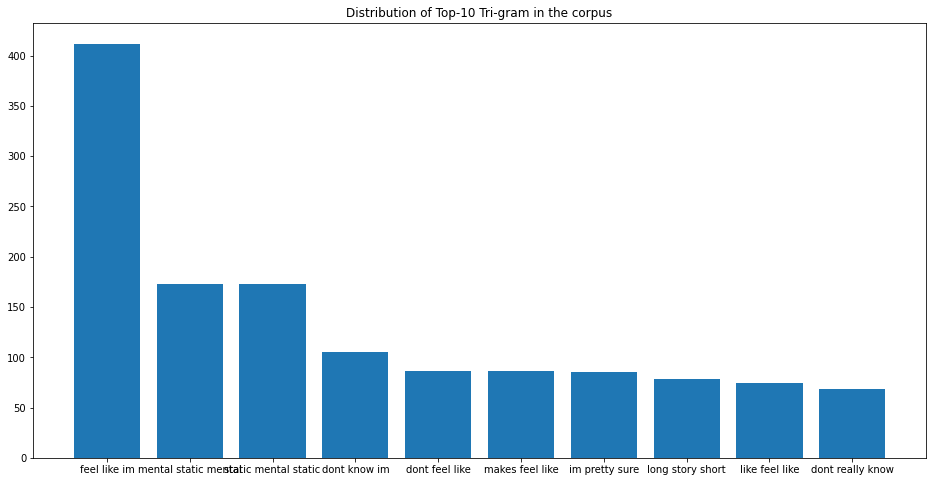

In [ ]:
x, y = zip(*top_text_ngrams)
plt.figure(1, figsize=(16, 8))
plt.subplot(1, 1, 1)
plt.bar(x, y)
plt.title('Distribution of Top-10 Tri-gram in the corpus')

In [ ]:
ngram_vect = TfidfVectorizer(ngram_range=(3,3), min_df = 4, stop_words = 'english')
ngram_doc = ngram_vect.fit_transform(mhsu_balanced['clean_text'])
print(ngram_doc.shape)
print(ngram_vect.get_feature_names())

(24000, 9186)
['aagian idk thing', 'ab ap research', 'abdomen arms itch', 'abdomen legs arms', 'abdomen usually mornings', 'abdominal pain pelvic', 'able fall asleep', 'able fullfill promise', 'able health issues', 'able live life', 'able make money', 'able pinpoint food', 'able play game', 'able promise wed', 'able really poop', 'able swallow food', 'able talk people', 'abnormal bowel movements', 'abnormal pap smears', 'abnormal scared uterineovarycervixal', 'absolute facts feel', 'absolutely appetite normally', 'abuse issues insomnia', 'abuse manipulation gaslighting', 'abused years multiple', 'accept payment offsite', 'accepted job offer', 'accepting payment booking', 'accepting payment outside', 'accessory parotid gland', 'accident feel like', 'account rover terminate', 'accused talking people', 'accutane high school', 'achieve goal thanks', 'achieving kid played', 'acknowledged understood powerful', 'action based monetary', 'action completely remove', 'action instead picking', 'ac

In [ ]:
Ng_features = pd.DataFrame(ngram_doc.toarray())
Ng_features.head()

,0,1,2,3,4,5,6,7,8,9,...,9176,9177,9178,9179,9180,9181,9182,9183,9184,9185
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
label = mhsu_balanced.label

X_train, X_test, y_train, y_test = train_test_split(Ng_features, label,
                                                    shuffle=True, 
                                                    test_size = 0.2, 
                                                    random_state = 42, 
                                                    stratify = label)

In [ ]:
print('Total number of data in X_train :{}' .format(len(X_train)))
print('Total number of data in X_test :{}' .format(len(X_test)))
print('Total number of data in y_train :{}' .format(len(y_train)))
print('Total number of data in y_test :{}' .format(len(y_test)))

Total number of data in X_train :19200
Total number of data in X_test :4800
Total number of data in y_train :19200
Total number of data in y_test :4800


## Logistics Regression (Baseline Model)

In [ ]:
logReg = LogisticRegression()
lg_model = logReg.fit(X_train, y_train.values.ravel())

# Prediction with Test data
y_pred_lg = lg_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_lg))

                 precision    recall  f1-score   support

   With Anxiety       0.65      0.27      0.38      2400
Without Anxiety       0.54      0.86      0.66      2400

       accuracy                           0.56      4800
      macro avg       0.60      0.56      0.52      4800
   weighted avg       0.60      0.56      0.52      4800



[[ 643 1757]
 [ 343 2057]]


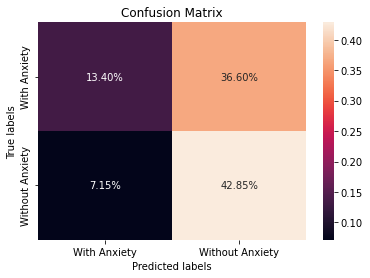

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_lg)
print(confusion_matrix(y_test, y_pred_lg))
#sns.heatmap(confusion_matrix(y_test, y_pred_lg), annot=True)
ax= plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['With Anxiety', 'Without Anxiety']); ax.yaxis.set_ticklabels(['With Anxiety', 'Without Anxiety']);

In [ ]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
import os
os.cpu_count()

2

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
        
        
lg_cv = LogisticRegression(max_iter = 1000)
parameters = {
    'C': [0.1, 0.5, 1, 5, 10, 50, 100]
}

cv = GridSearchCV(lg_cv, parameters, cv=5, n_jobs = -1)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


BEST PARAMS: {'C': 1}

0.552 (+/-0.01) for {'C': 0.1}
0.552 (+/-0.009) for {'C': 0.5}
0.553 (+/-0.008) for {'C': 1}
0.552 (+/-0.01) for {'C': 5}
0.552 (+/-0.007) for {'C': 10}
0.551 (+/-0.007) for {'C': 50}
0.55 (+/-0.007) for {'C': 100}


In [ ]:
lg_reg = LogisticRegression(max_iter = 50, n_jobs = 2)
lg_reg.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=50, n_jobs=2)

In [ ]:
lg_pred = lg_reg.predict(X_test)
print(classification_report(y_test, lg_pred))

                 precision    recall  f1-score   support

   With Anxiety       0.65      0.27      0.38      2400
Without Anxiety       0.54      0.86      0.66      2400

       accuracy                           0.56      4800
      macro avg       0.60      0.56      0.52      4800
   weighted avg       0.60      0.56      0.52      4800



## Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()

rf_model = rf.fit(X_train, y_train.values.ravel())

In [ ]:
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

                 precision    recall  f1-score   support

   With Anxiety       0.64      0.30      0.41      2400
Without Anxiety       0.54      0.83      0.66      2400

       accuracy                           0.57      4800
      macro avg       0.59      0.57      0.53      4800
   weighted avg       0.59      0.57      0.53      4800



[[ 723 1677]
 [ 400 2000]]


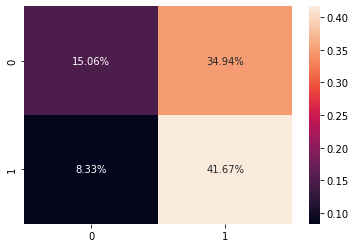

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix(y_test, y_pred_rf))
#sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

## Hyperparameter Tunning for Random Forest Classifier

In [ ]:
# Using the GridSearch Cross validation method at 5-fold and hyper-parameter tuning of n_estimators and max_depth 
# to determine the best hyper-parameter settings that will produce the optimal performance for the RF classifier

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
        
        
rf_cv = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf_cv, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

In [ ]:
# Refit the three best hyper-parameter models on the full training set
# 0.312 (+/-0.008) for {'max_depth': None, 'n_estimators': 5}
# 0.321 (+/-0.005) for {'max_depth': None, 'n_estimators': 50}
# 0.321 (+/-0.008) for {'max_depth': None, 'n_estimators': 100}

rf1 = RandomForestClassifier(n_estimators=5, max_depth=None)
rf1.fit(X_train, y_train.values.ravel())

rf2 = RandomForestClassifier(n_estimators=50, max_depth=None)
rf2.fit(X_train, y_train.values.ravel())

rf3 = RandomForestClassifier(n_estimators=100, max_depth=None)
rf3.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [ ]:
rf1_pred = rf1.predict(X_test)
rf2_pred = rf2.predict(X_test)
rf3_pred = rf3.predict(X_test)

In [ ]:
print(classification_report(y_test, rf1_pred))
print(classification_report(y_test, rf2_pred))
print(classification_report(y_test, rf3_pred))

              precision    recall  f1-score   support

        ADHD       0.27      0.81      0.41       900
     anxiety       0.40      0.14      0.21       900
      autism       0.44      0.14      0.21       900
  depression       0.49      0.20      0.28       900

    accuracy                           0.32      3600
   macro avg       0.40      0.32      0.28      3600
weighted avg       0.40      0.32      0.28      3600

              precision    recall  f1-score   support

        ADHD       0.39      0.16      0.22       900
     anxiety       0.43      0.16      0.24       900
      autism       0.28      0.78      0.42       900
  depression       0.48      0.22      0.31       900

    accuracy                           0.33      3600
   macro avg       0.40      0.33      0.30      3600
weighted avg       0.40      0.33      0.30      3600

              precision    recall  f1-score   support

        ADHD       0.41      0.16      0.23       900
     anxiety       0.

# Result
rf3 gave the optimal prdiction having **n_estimators**=100, and **max_depth**=None

## Support Vector Machine  Pipeline

In [ ]:
svm = SVC()
svm_model = svm.fit(X_train, y_train.values.ravel())

# Prediction with Test data
y_pred_svm = svm_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_svm))

                 precision    recall  f1-score   support

   With Anxiety       0.64      0.32      0.43      2400
Without Anxiety       0.55      0.82      0.65      2400

       accuracy                           0.57      4800
      macro avg       0.59      0.57      0.54      4800
   weighted avg       0.59      0.57      0.54      4800



[[ 772 1628]
 [ 443 1957]]


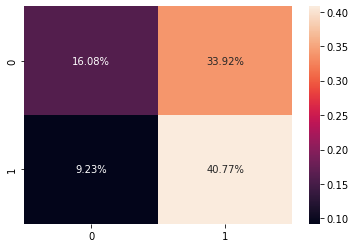

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_svm)
print(confusion_matrix(y_test, y_pred_svm))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

## Naive Bayes Pipeline

In [ ]:
nb = MultinomialNB()
nb_model = nb.fit(X_train, y_train.values.ravel())

# Prediction with Test data
y_pred_nb = nb_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_nb))

                 precision    recall  f1-score   support

   With Anxiety       0.55      0.83      0.66      2400
Without Anxiety       0.66      0.33      0.44      2400

       accuracy                           0.58      4800
      macro avg       0.60      0.58      0.55      4800
   weighted avg       0.60      0.58      0.55      4800



[[1983  417]
 [1604  796]]


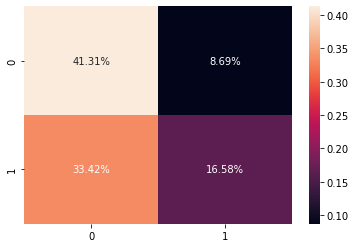

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_nb)
print(confusion_matrix(y_test, y_pred_nb))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')


## **Deep Learning Approach**

In [ ]:
#from keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Embedding,CuDNNLSTM,Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Changing class labels to numeric for Recurrent Neural Network
mhsu_balanced.label[mhsu_balanced.label == 'With Anxiety'] = 1
mhsu_balanced.label[mhsu_balanced.label == 'Without Anxiety'] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
x = mhsu_balanced['clean_text']
#y = mhsu_balanced['label']
y = np.asarray(mhsu_balanced['label']).astype(np.float32)

In [ ]:
x

31579    trying join discord servers make new friends u...
32895    stop worrying thinking severe health anxiety o...
44954                                may gerd lol imma see
39341    want break contact nagging urge write text mes...
39009    grad school went years college never made clos...
                               ...                        
12989    hello everyone piggy lucky seemed convulsing r...
9291     thought since considered leftist two years ago...
9889     developed fucking eating disorder im fucking t...
11410    rather not apply another credit card already t...
9487     work big box store often forget scan items esp...
Name: clean_text, Length: 24000, dtype: object

In [ ]:
token = Tokenizer()
token.fit_on_texts(x)
seq = token.texts_to_sequences(x)

In [ ]:
pad_seq = pad_sequences(seq,maxlen=300)

In [ ]:
vocab_size = len(token.word_index)+1

In [ ]:
embedding_vector = {}
f = open('/content/drive/MyDrive/Mindsum/glove.840B.300d.txt')
for line in tqdm(f):
    value = line.split(' ')
    word = value[0]
    coef = np.array(value[1:],dtype = 'float32')
    embedding_vector[word] = coef

2196018it [02:10, 16790.13it/s]


In [ ]:
embedding_matrix = np.zeros((vocab_size,300))
for word,i in tqdm(token.word_index.items()):
    embedding_value = embedding_vector.get(word)
    if embedding_value is not None:
        embedding_matrix[i] = embedding_value

100%|██████████| 52684/52684 [00:00<00:00, 401549.54it/s]


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,300,weights = [embedding_matrix],input_length=300,trainable = False))
model.add(Bidirectional(LSTM(32, dropout= 0, recurrent_dropout=0)))
#model.add(LSTM(32, dropout= 0, recurrent_dropout=0))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])
history = model.fit(pad_seq,y,epochs = 10,batch_size=256,validation_split=0.2)

Epoch 1/10
75/75 [==============================] - 12s 47ms/step - loss: -2.6909 - accuracy: 0.6004 - val_loss: -22.4523 - val_accuracy: 0.0000e+00
Epoch 2/10
75/75 [==============================] - 3s 34ms/step - loss: -17.2644 - accuracy: 0.6250 - val_loss: -73.9838 - val_accuracy: 0.0000e+00
Epoch 3/10
75/75 [==============================] - 3s 34ms/step - loss: -40.8376 - accuracy: 0.6250 - val_loss: -149.2042 - val_accuracy: 0.0000e+00
Epoch 4/10
75/75 [==============================] - 3s 34ms/step - loss: -73.7121 - accuracy: 0.6250 - val_loss: -249.3014 - val_accuracy: 0.0000e+00
Epoch 5/10
75/75 [==============================] - 3s 34ms/step - loss: -116.0106 - accuracy: 0.6250 - val_loss: -375.2204 - val_accuracy: 0.0000e+00
Epoch 6/10
75/75 [==============================] - 3s 34ms/step - loss: -167.7374 - accuracy: 0.6250 - val_loss: -525.4956 - val_accuracy: 0.0000e+00
Epoch 7/10
75/75 [==============================] - 3s 34ms/step - loss: -228.7460 - accuracy: 0.625

RNN Anxiety
Accuracy ---> 62.50%

## **Ensemble Building**



In [ ]:
from nltk.metrics.scores import accuracy
import time
bag_model = BaggingClassifier()

start = time.ctime()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
score = cross_val_score(bag_model, X_train, y_train, scoring="accuracy", cv=cv, n_jobs=-1)
print(f"Mean Accuracy: {np.mean(score):.3f}\nRun time:{(time() - start): .3f}s")




In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 0)
# fitting the model
tree = tree.fit(X_train, y_train)
# Predicting the training set
y_train_pred = tree.predict(X_train)
# Predicting the test set
y_test_pred = tree.predict(X_test)


print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))


0.5302777777777777
0.3175


In [ ]:
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

        ADHD       0.83      0.39      0.53      3600
     anxiety       0.90      0.37      0.52      3600
      autism       0.35      0.96      0.52      3600
  depression       0.98      0.40      0.57      3600

    accuracy                           0.53     14400
   macro avg       0.77      0.53      0.54     14400
weighted avg       0.77      0.53      0.54     14400

              precision    recall  f1-score   support

        ADHD       0.39      0.14      0.21       900
     anxiety       0.42      0.13      0.20       900
      autism       0.28      0.81      0.41       900
  depression       0.48      0.18      0.27       900

    accuracy                           0.32      3600
   macro avg       0.39      0.32      0.27      3600
weighted avg       0.39      0.32      0.27      3600



In [ ]:
BaggingClassifier().get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
          base_estimator=LogisticRegression(),
          n_estimators=100,
          random_state=0)

bag_model.fit(X_train, y_train.values.ravel())

# Predicting the training set
y_train_bag = bag_model.predict(X_train)
# Predicting the test set
y_test_bag = bag_model.predict(X_test)

accuracy_score(y_train, y_train_bag)
accuracy_score(y_test, y_test_bag)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.5625

In [ ]:
print(classification_report(y_test, y_test_bag))

                 precision    recall  f1-score   support

   With Anxiety       0.65      0.27      0.38      2400
Without Anxiety       0.54      0.85      0.66      2400

       accuracy                           0.56      4800
      macro avg       0.59      0.56      0.52      4800
   weighted avg       0.59      0.56      0.52      4800



[[ 651 1749]
 [ 351 2049]]


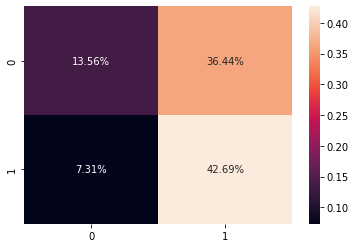

In [ ]:
cf_matrix = confusion_matrix(y_test, y_test_bag)
print(confusion_matrix(y_test, y_test_bag))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
          base_estimator=nb_model,
          n_estimators=100,
          random_state=0)

bag_model.fit(X_train, y_train.values.ravel())

# Predicting the training set
y_train_bag = bag_model.predict(X_train)
# Predicting the test set
y_test_bag = bag_model.predict(X_test)

accuracy_score(y_train, y_train_bag)
accuracy_score(y_test, y_test_bag)

0.33611111111111114

In [ ]:
print(classification_report(y_test, y_test_bag))

              precision    recall  f1-score   support

        ADHD       0.28      0.77      0.41       900
     anxiety       0.43      0.17      0.24       900
      autism       0.46      0.16      0.24       900
  depression       0.52      0.25      0.33       900

    accuracy                           0.34      3600
   macro avg       0.42      0.34      0.31      3600
weighted avg       0.42      0.34      0.31      3600



In [ ]:
confusion_matrix(y_test, y_test_bag)

array([[691,  68,  71,  70],
       [615, 150,  58,  77],
       [627,  64, 146,  63],
       [566,  69,  42, 223]])

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
          base_estimator=RandomForestClassifier(),
          n_estimators=100,
          random_state=0)

bag_model.fit(X_train, y_train.values.ravel())

# Predicting the training set
y_train_bag = bag_model.predict(X_train)
# Predicting the test set
y_test_bag = bag_model.predict(X_test)

accuracy_score(y_train, y_train_bag)
accuracy_score(y_test, y_test_bag)

0.5541666666666667

In [ ]:
print(classification_report(y_test, y_test_bag))

                 precision    recall  f1-score   support

   With Anxiety       0.63      0.26      0.37      2400
Without Anxiety       0.53      0.85      0.66      2400

       accuracy                           0.55      4800
      macro avg       0.58      0.55      0.51      4800
   weighted avg       0.58      0.55      0.51      4800



[[ 626 1774]
 [ 366 2034]]


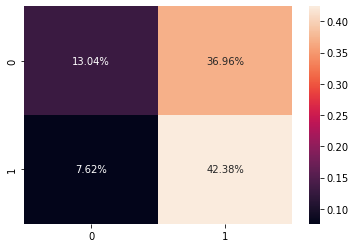

In [ ]:
cf_matrix = confusion_matrix(y_test, y_test_bag)
print(confusion_matrix(y_test, y_test_bag))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')